参考 [SymPy Tutorail](http://docs.sympy.org/latest/tutorial/index.html)

基本思想
--------

### 符号定义

`symbols` takes a string of variable names separated by spaces or commas, and creates Symbols out of them.We can then assign these to variable names.`x,y,z = symbols('x y z')` 创建了三个symbol，然后赋值给了python的三个variable x,y,z， 使得x,y,z成为了symbol。其实就是使用symbols函数创建三个sympy使用的symbol对象。

    x = symbols('x')
    expr = x + 1 #SymPy expressions are immutable
    x = 2
    print(expr)
 
上面代码的输出是 x + 1，不是2。注意sympy中的symbol和python中的variable还是不同的。想替换sympy中的symbol需要使用方法**subs**

    #SymPy expressions are immutable
    expr.subs(x,2) #  输出为3
    
    expr = x**3 + 4*x*y - z
    expr.subs([(x, 2), (y, 4), (z, 0)])#一次替换多个符号，输出 40 


当sympy中的symbol和python中的variable在同一个表达式时，variable将自动转化为symbol。

**SymPy expressions are immutable**

### sympy中的等号

一般的等式中我们使用 `=` 来表示相等的关系：`x+1 = y`，但在sympy中使用函数 Eq 表示等式中的等号，例如：`Eq(x+1,4)`。不过我们可以使用`==`来判断两个表达式的结构和变量是否相同(`==`represents exact structural equality testing)。

There is also a method called equals that tests if two expressions are equal by evaluating them numerically at random points.

### sympy中的 `^` 和 `/`

sympy和python一样使用 `**`表示幂运算，在python与sympy中 `^` 表示逻辑异或

sympy中的 `/` 将生成一个分数但python中的 `/` 不会生成分数，所以在sympy中应使用`Rational`表示整数之间的除法：

    x + 1/2  #输出 x + 0.5
    x + Integer(1)/2 #输出 x+1/2
    x + Rational(1,2) #输出 x+1/2 这两个不同输出对最后的计算结果是有影响的，因为浮点数无法精确表示

In [1]:
import sympy as sy
sy.init_printing(use_unicode=True)

In [2]:
#定义符号，注意 a 的输出
x,y,z,a= sy.symbols('x y z hehe')
x,y,z,a

sympy中一些常用函数
-------------------

### init_printing(use_unicode=True) 
使公式的打印变得好看

### init_session()
The init_session() function will automatically import everything in SymPy, create some common Symbols, setup plotting, and run init_printing().

### str srepr pprint latex print_mathml dotprint
使用不同的格式打印表达式

### sympify

In [3]:
 #将字符串转化为sympy表达式，字符串中不能使用等号 `=` 表示“等”。注意sympy中表达式与等式的区别
rhs_expr = sy.sympify("x+y")
#sy.sympify("x+y = z") #是错误的
eql_expr = sy.Eq(z,rhs_expr)
eql_expr

### simplify
注意sympify和simplify使完全不同的函数，只不过二者“长得”很像。

simplify的输出不一定是是我们所需要的形式，这时就需要使用那些专用的简化函数[参考](http://docs.sympy.org/latest/tutorial/simplification.html)

In [4]:
expr = x**2 + 2*x + 1
print(sy.simplify(expr)) #注意两种简化函数输出的不同之处，还有其他不同用处的简化函数
print(sy.factor(expr))

x**2 + 2*x + 1
(x + 1)**2


### evalf

In [5]:
sqrt5 = sy.sqrt(5).evalf(10) #evalf可以将数值表达式转化为任意精度的浮点数，默认精度为15位小数点
pi9 = sy.pi.evalf(9)
print(sqrt5,pi9)
 #两种方式获得表达式的实数值
print(sy.sin(x).subs(x,9).evalf())
print(sy.sin(x).evalf(subs={x:9}))

(2.236067978, 3.14159265)
0.412118485241757
0.412118485241757


### lambdify

In [6]:
#如果我们想一次求出sympy表达式在多个点处的实数值，可以使用函数lambdify
#it converts the SymPy names to the names of the given numerical library, usually NumPy
import numpy as np
a = np.arange(5)
expr = sy.sin(x)
f = sy.lambdify(x,expr,"numpy") #f = lambdify(x, expr, "math") ,使用math库也可以
print(f(a))
print(f(1))
#其他用法见手册

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
0.841470984808


In [7]:
x,t,z,nu = sy.symbols('x t z nu')
expr = sy.sin(x)*sy.exp(3*y)*sy.cos(x)
expr

sympy中的微积分
--------------

### 导数

In [8]:
sy.pprint(sy.diff(expr,x))
#diff can take multiple derivatives at once. 
#To take multiple derivatives, pass the variable as many times as you wish to differentiate, 
#or pass a number after the variable. 
#For example, both of the following find the third derivative of \(x^4\).
sy.pprint(sy.diff(expr,x,x,x,x))
sy.pprint(sy.diff(expr,x,4))
#You can also take derivatives with respect to many variables at once.
sy.pprint(sy.diff(expr,x,2,y,2))
#diff can also be called as a method
sy.pprint(sy.sympify('9**(3*x)').diff(x,2))

   3⋅y    2       3⋅y    2   
- ℯ   ⋅sin (x) + ℯ   ⋅cos (x)
    3⋅y              
16⋅ℯ   ⋅sin(x)⋅cos(x)
    3⋅y              
16⋅ℯ   ⋅sin(x)⋅cos(x)
     3⋅y              
-36⋅ℯ   ⋅sin(x)⋅cos(x)
   3⋅x    2   
9⋅9   ⋅log (9)


In [9]:
#创建一个没有计算的求导对象，可以使用方法doit来计算这个对象
expr = sy.sympify('sin(x)')
diff_obj = sy.Derivative(expr)
sy.pprint(diff_obj)
sy.pprint(diff_obj.doit())

d         
──(sin(x))
dx        
cos(x)


### 积分

 3
x 
──
3 


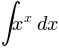

In [10]:
#不定积分
sy.pprint(sy.integrate(x**2,x))
#如果sympy无法计算积分，则返回一个未解决的积分对象
sy.integrate(sy.sympify('x**x'),x)

In [11]:
#定积分，注意正负无穷的输入方式：+sy.oo  -sy.oo
sy.pprint(sy.integrate(sy.sin(x**2),(x,-sy.oo,sy.oo)))
sy.pprint(sy.integrate(sy.exp(-x**2 - y**2), (x, -sy.oo, sy.oo), (y, -sy.oo, sy.oo)))

√2⋅√π
─────
  2  
π


In [12]:
#创建一个积分对象。可以使用方法doit来计算这个积分
in_obj = sy.Integral(sy.log(x)**2,x)
sy.pprint(in_obj)
sy.pprint(in_obj.doit())

⌠           
⎮    2      
⎮ log (x) dx
⌡           
     2                      
x⋅log (x) - 2⋅x⋅log(x) + 2⋅x


### 极限

In [13]:
#求极限
sy.limit(sy.sin(x)/x,x,0)
#创建一个极限对象，使用doit执行
expr = sy.Limit(sy.sin(x)/x,x,0)
sy.pprint(expr.doit())
#正负极限
sy.pprint(sy.limit(1/x,x,0,'-'))

1
-∞


### 级数

In [14]:
expr = sy.exp(sy.sin(x))
expr.series(x,0,4) # the third parameter has default value 6

In [15]:
#去除输出的拉格朗日余项，大写的 o 
expr.series(x,0).removeO()

### 有限差分（Finite differences）
[参考](http://docs.sympy.org/latest/tutorial/calculus.html#finite-differences)

解方程
-----
**Any expression not in an Eq is automatically assumed to equal 0 by the solving functions**

In [16]:
#因为solving函数默认表达式等于0，所以求方程组是我们可以不使用Eq函数
#sympy中有个函数solve，但好像有什么问题，不太推荐使用，
#If there are no solutions, an EmptySet is returned and if it is not able to find solutions then a ConditionSet is returned.
#到sympy1.0为止，sympy还不能很好的解非线性方程，solveset函数在解非线性方程时不会给出理想的答案
#可以使用nsolve来解非线性方程，数值解
print(sy.solveset(sy.Eq(x**2,1),x))
print(sy.solveset(x**2-1,x)) #稍微对等式做点变化就可以不使用Eq函数

{-1, 1}
{-1, 1}


In [17]:
expr = sy.cos(x) - sy.exp(x)  #sy.sin(x) - x 有解但将返回 ConditionSet  ？？？？？
#sy.pprint(sy.solveset(expr, x, domain=sy.S.Reals))#无解
sy.solveset(sy.sin(x) + x,x )

### 解线性方程组

In [18]:
print(sy.linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z)))
print(sy.linsolve(sy.Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z)))  #矩阵形式的方程组

{(-y - 1, y, 2)}
{(-y - 1, y, 2)}


In [19]:
#解方程
sy.solve(x-1,x)

In [20]:
#解微分方程
y = sy.Function('y') #定义function对象
f, g = sy.symbols('f g', cls=sy.Function) #使用symbols定义function对象
sy.dsolve(sy.Eq(y(t).diff(t,t)-y(t),sy.exp(t)),y(t)) #使用dsolve解微分方程

线性代数
--------

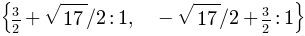

In [21]:
#求矩阵的特征值
#对于数值类型的矩阵运算最好使用numpy
sy.Matrix([[1,2],[2,2]]).eigenvals()